In [1]:
# Import Packages
#using Pkg  # Package to install new packages

In [2]:
# Install packages 
#Pkg.add("DataFrames")
#Pkg.add("CSV")
#Pkg.add("Plots")
#Pkg.add("Lathe")
#Pkg.add("GLM")
#Pkg.add("StatsPlots")
#Pkg.add("MLBase")

In [3]:
# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

In [4]:
# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

In [5]:
df = DataFrame(CSV.File("./Life-Expectancy-Data.csv"))

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
,String,Int64,String,Float64?,Int64?,Int64,Float64?,Float64,Int64?,Int64,Float64?,Int64,Int64?,Float64?,Int64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2.88317e6,18.4,18.4,0.448,9.2
7,Afghanistan,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331.0,18.6,18.7,0.434,8.9
8,Afghanistan,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2.72943e6,18.8,18.9,0.433,8.7
9,Afghanistan,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,2.66168e7,19.0,19.1,0.415,8.4


In [6]:
first(df,5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
,String,Int64,String,Float64?,Int64?,Int64,Float64?,Float64,Int64?,Int64,Float64?,Int64,Int64?,Float64?,Int64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5


In [7]:
println(size(df))

(2938, 22)


In [8]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Country,,Afghanistan,,Zimbabwe,0,String
2,Year,2007.52,2000,2008.0,2015,0,Int64
3,Status,,Developed,,Developing,0,String
4,Life expectancy,69.2249,36.3,72.1,89.0,10,"Union{Missing, Float64}"
5,Adult Mortality,164.796,1,144.0,723,10,"Union{Missing, Int64}"
6,infant deaths,30.3039,0,3.0,1800,0,Int64
7,Alcohol,4.60286,0.01,3.755,17.87,194,"Union{Missing, Float64}"
8,percentage expenditure,738.251,0.0,64.9129,19479.9,0,Float64
9,Hepatitis B,80.9405,1,92.0,99,553,"Union{Missing, Int64}"


In [9]:
# Check column names
names(df)

22-element Vector{String}:
 "Country"
 "Year"
 "Status"
 "Life expectancy "
 "Adult Mortality"
 "infant deaths"
 "Alcohol"
 "percentage expenditure"
 "Hepatitis B"
 "Measles "
 " BMI "
 "under-five deaths "
 "Polio"
 "Total expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income composition of resources"
 "Schooling"

In [10]:
# Fix column names by replaceing ' ', '-', '/' with '_'
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

In [11]:
# Deleting rows with missing data
df = dropmissing(df)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
,String,Int64,String,Float64,Int64,Int64,Float64,Float64,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2.88317e6,18.4,18.4,0.448,9.2
7,Afghanistan,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331.0,18.6,18.7,0.434,8.9
8,Afghanistan,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2.72943e6,18.8,18.9,0.433,8.7
9,Afghanistan,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,2.66168e7,19.0,19.1,0.415,8.4


In [12]:
println(size(df))

(1649, 22)


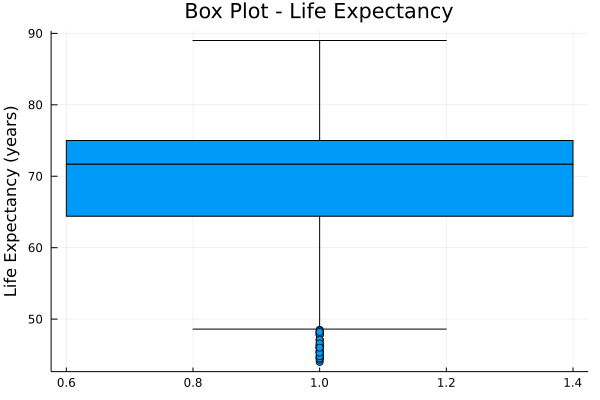


(process:16804): GLib-GIO-WARNING **: 07:18:02.598: Unexpectedly, UWP app `HaukeGtze.NotepadEditor_1.795.1.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.NotepadEditor_6bk20wvc8rfx2!notepad') supports 182 extensions but has no verbs


In [13]:
# Box Plot
boxplot(df.Life_expectancy, title = "Box Plot - Life Expectancy", ylabel = "Life Expectancy (years)", legend = false)

In [14]:
# Outlier removal
first_percentile = percentile(df.Life_expectancy, 25)
iqr_value = iqr(df.Life_expectancy)
df = df[df.Life_expectancy .>  (first_percentile - 1.5*iqr_value),:];

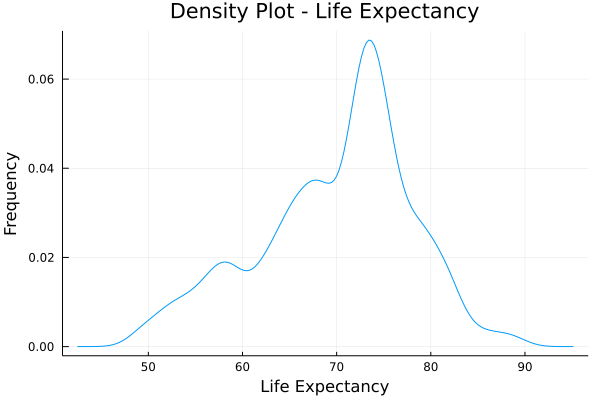

In [15]:
# Density Plot
density(df.Life_expectancy , title = "Density Plot - Life Expectancy", ylabel = "Frequency", xlabel = "Life Expectancy", legend = false)

Correlation of Life Expectancy with Adult Mortality Rate is -0.6869431978476528




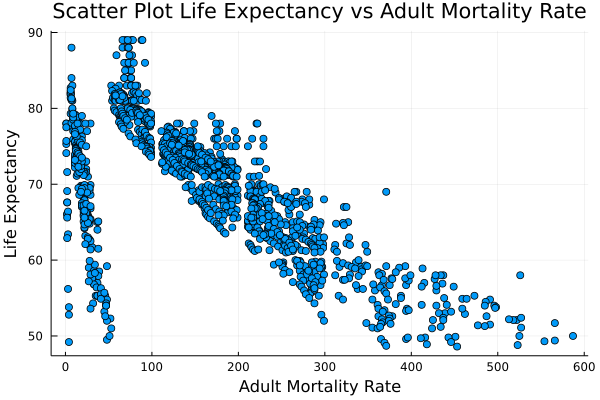

In [16]:
# Correlation Analysis
println("Correlation of Life Expectancy with Adult Mortality Rate is ", cor(df.Adult_Mortality,df.Life_expectancy), "\n\n")

# Scatter plot
train_plot = scatter(df.Adult_Mortality,df.Life_expectancy, title = "Scatter Plot Life Expectancy vs Adult Mortality Rate", ylabel = "Life Expectancy", xlabel = "Adult Mortality Rate",legend = false)

In [17]:
# One hot encoding
encoder = Lathe.preprocess.OneHotEncoder()
scaled_feature = encoder.predict(df,:Status)
select!(df, Not([:Status,:Country]))
first(df,5)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Developing,Developed
,Int64,Float64,Int64,Int64,Float64,Float64,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool
1,2015,65.0,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1,1,0
2,2014,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582.0,17.5,17.5,0.476,10.0,1,0
3,2013,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9,1,0
4,2012,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8,1,0
5,2011,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5,1,0


In [18]:
# Train test split
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.75)

(1182×22 DataFrame
  Row │ Year   Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  BMI      under_five_deaths  Polio  Total_expenditure  Diphtheria  HIV_AIDS  GDP        Population      thinness__1_19_years  thinness_5_9_years  Income_composition_of_resources  Schooling  Developing  Developed 
      │ Int64  Float64          Int64            Int64          Float64  Float64                 Int64        Int64    Float64  Int64              Int64  Float64            Int64       Float64   Float64    Float64         Float64               Float64             Float64                          Float64    Bool        Bool      
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [19]:
fm = @formula(Life_expectancy ~ Adult_Mortality)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Life_expectancy ~ 1 + Adult_Mortality

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)      78.1697    0.298745    261.66    <1e-99  77.5836     78.7558
Adult_Mortality  -0.050932  0.00152778  -33.34    <1e-99  -0.0539294  -0.0479345
────────────────────────────────────────────────────────────────────────────────

In [20]:
# R Square value of the model
r2(linearRegressor)

0.4850246057037396

In [21]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Life_expectancy], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [22]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [23]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [24]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 4.5261172492185935

Mean Aboslute Percentage test error: 0.06778597608156205

Root mean square test error: 6.167945890765157

Mean square test error: 38.043556511406784



In [25]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 4.210499975647398

Mean Absolute Percentage train error: 0.06221085408822255

Root mean square train error: 5.807308169161753

Mean square train error: 33.72482817161283



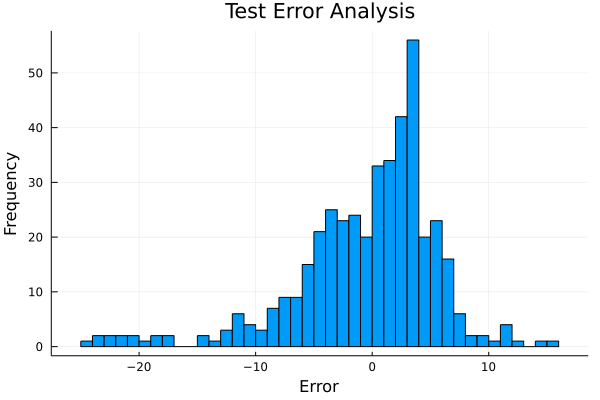

In [26]:
# Histogram of error to see if it's normally distributed  on test dataset
histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

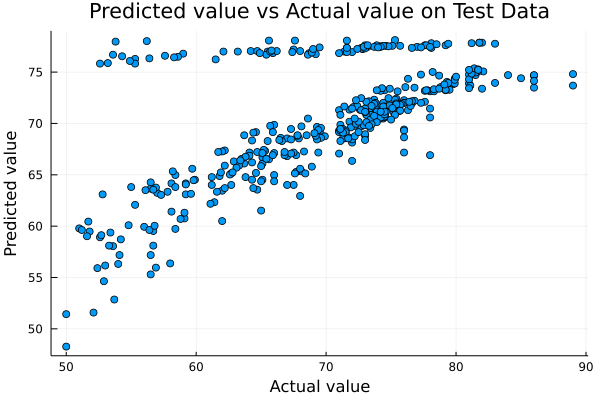

In [27]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)

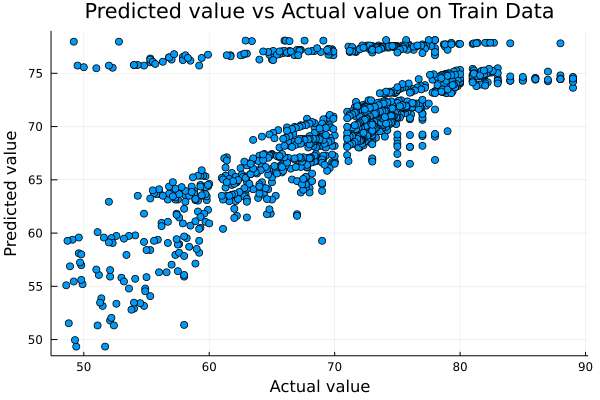

In [28]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)

In [29]:
# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Life_expectancy ~ Adult_Mortality))
    a = collect(Kfold(size(train)[1], k))
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Life_expectancy], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [30]:
cross_validation(train,10)

Mean error for set 1 is 3.9402130940030258
Mean error for set 2 is 4.307118405711275
Mean error for set 3 is 4.061661595860352
Mean error for set 4 is 3.642325426949624
Mean error for set 5 is 4.20195054254032
Mean error for set 6 is 4.474671160352849
Mean error for set 7 is 4.422824839214545
Mean error for set 8 is 4.566445420855108
Mean error for set 9 is 4.323496649603015
Mean error for set 10 is 4.247367277517051


# Multiple Linear Regression

In [31]:
fm = @formula(Life_expectancy ~ Adult_Mortality + infant_deaths + Developing + BMI + Total_expenditure + HIV_AIDS   + Income_composition_of_resources)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Life_expectancy ~ 1 + Adult_Mortality + infant_deaths + Developing + BMI + Total_expenditure + HIV_AIDS + Income_composition_of_resources

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────────
                                       Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                      62.2057      0.807884      77.00    <1e-99  60.6206      63.7907
Adult_Mortality                  -0.0213144   0.00131454   -16.21    <1e-52  -0.0238935   -0.0187353
infant_deaths                    -0.00364993  0.000875981   -4.17    <1e-04  -0.00536859  -0.00193127
Developing                       -2.6839      0.357276      -7

In [32]:
# R Square value of the model
r2(linearRegressor)

0.7759023061184108

In [33]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame
performance_testdf = DataFrame(y_actual = test[!,:Life_expectancy], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame
performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [34]:
# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 3.0400137477354177

Mean Aboslute Percentage test error: 0.0453150022392212

Root mean square test error: 3.996271105251394

Mean square test error: 15.970182746667197



In [35]:
# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Aboslute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean train error: 2.8163738080529366

Mean Aboslute Percentage train error: 0.04214902723036192

Root mean square train error: 3.8308956916759773

Mean square train error: 14.675761800501563



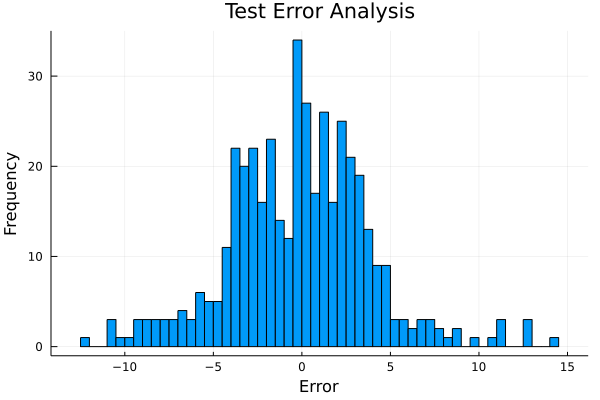

In [36]:
# Histogram of error to see if it's normally distributed  on test dataset
histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

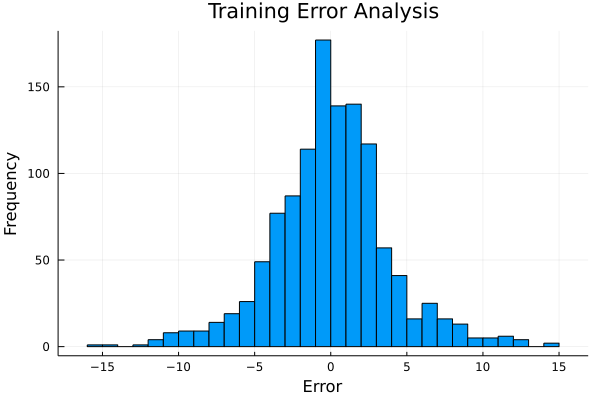

In [37]:
# Histogram of error to see if it's normally distributed  on train dataset
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

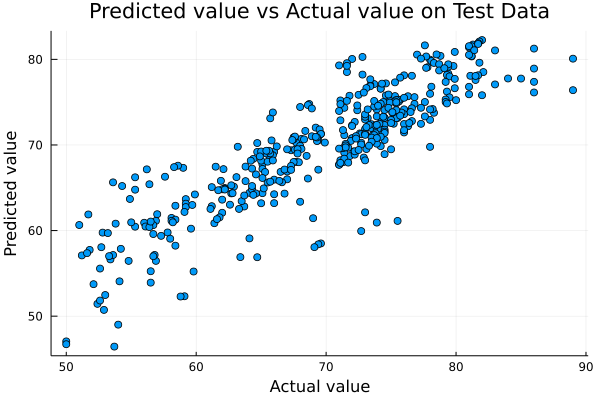

In [38]:
# Scatter plot of actual vs predicted values on test dataset
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)

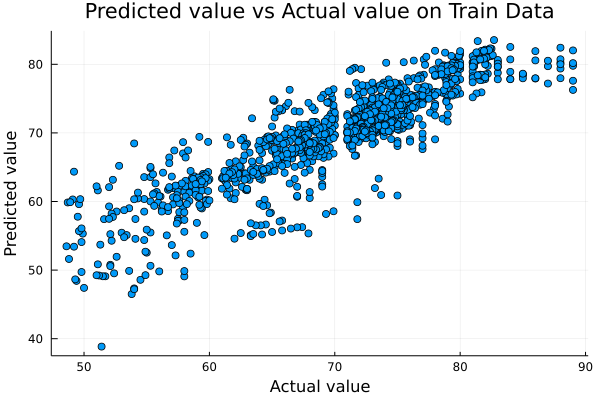

In [39]:
# Scatter plot of actual vs predicted values on train dataset
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)

In [40]:
cross_validation(train,10, fm)

Mean error for set 1 is 2.924323431949687
Mean error for set 2 is 2.813797163160202
Mean error for set 3 is 2.9682918496071626
Mean error for set 4 is 2.7114088442039814
Mean error for set 5 is 2.9090317627371896
Mean error for set 6 is 2.6055046481787794
Mean error for set 7 is 3.289561680784991
Mean error for set 8 is 2.757397303892364
Mean error for set 9 is 2.647322642768824
Mean error for set 10 is 2.826864298631443


In [41]:
# Cook's Distance function definition
function cook_distance(train,n_coeff = 2, fm = @formula(Life_expectancy ~ Adult_Mortality))
    linearRegressor = lm(fm, train)

    # MSE calculation
    performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = predict(linearRegressor, train))
    performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
    performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error
    mse = mean(performance_traindf.error_sq)

    cooks_distance = []
    for i in 1:size(train)[1]
        total_rows = collect(1:size(train)[1])
        training_rows = deleteat!(total_rows, total_rows .== i)
        temp_train = train[training_rows,:]
        linearRegressor = lm(fm, temp_train)

        temp_performance_traindf = performance_traindf[training_rows,:]

        # Predicted Value
        ypredicted_train = predict(linearRegressor, temp_train)

        # Test Performance DataFrame
        performance_df = DataFrame(yi = temp_performance_traindf.y_predicted, yj = ypredicted_train)
        performance_df.y_diff = performance_df[!,:yi] - performance_df[!,:yj] 
        performance_df.y_diff_sq = performance_df.y_diff.*performance_df.y_diff
        cooks_d = sum(performance_df.y_diff_sq)/(n_coeff*mse)
        push!(cooks_distance,cooks_d)
    end
    cooks_distance_df = DataFrame(index = collect(1:size(train)[1]), cooks_d = cooks_distance )
    return cooks_distance_df
end

cook_distance (generic function with 3 methods)

In [42]:
# Calculate Cook's Distance
cooks_distance_df = cook_distance(train, 9, fm);
mean_cooks_distance = mean(cooks_distance_df.cooks_d)
influencial_points = cooks_distance_df[cooks_distance_df.cooks_d .> 4*mean_cooks_distance,:]
println(mean_cooks_distance)

0.0012981931922141313


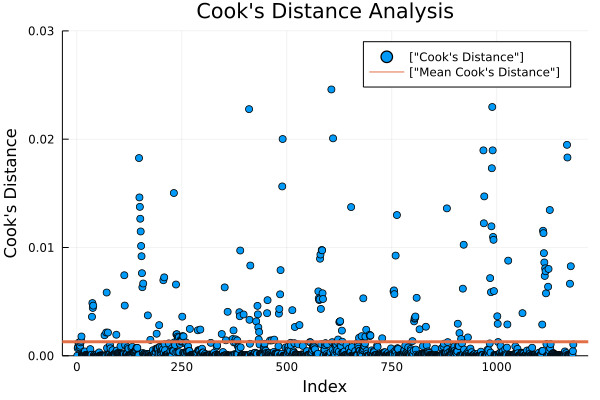

In [43]:
plot = scatter(cooks_distance_df.index, cooks_distance_df.cooks_d, title = "Cook's Distance Analysis", ylabel = "Cook's Distance", xlabel = "Index",  label = ["Cook's Distance"], ylim = (0,0.03))
hline!([mean_cooks_distance], lw = 3,  label = ["Mean Cook's Distance"])
plot

In [44]:
high_cooksd_points = cooks_distance_df[cooks_distance_df.cooks_d .> 0.02,:]
influencial_points_df = train[high_cooksd_points.index,[:Adult_Mortality, :infant_deaths, :Developing, :BMI, :Total_expenditure, :HIV_AIDS,   :Income_composition_of_resources]]

,Adult_Mortality,infant_deaths,Developing,BMI,Total_expenditure,HIV_AIDS,Income_composition_of_resources
,Int64,Int64,Bool,Float64,Float64,Float64,Float64
1,12,0,1,5.5,8.5,0.1,0.0
2,129,2,1,46.0,6.94,0.1,0.0
3,214,1600,1,13.0,4.22,0.3,0.518
4,13,1,1,6.2,8.91,0.1,0.0
5,15,1,1,59.7,9.3,0.1,0.0
6,17,1,1,59.1,1.5,0.1,0.0
7,52,4,1,3.2,11.79,10.5,0.469
8,4,556,1,19.3,4.11,5.4,0.463
9,188,0,1,27.1,4.62,0.1,0.0
